In [1]:
import pandas as pd
import numpy  as np
import math
from scipy import signal
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
user_balance_table = pd.read_csv(r"./user_balance_table.csv", sep=',', engine='python', encoding='utf-8',
                                 parse_dates=['report_date'])
mfd_day_share_interest = pd.read_csv(r"./mfd_day_share_interest.csv", sep=',', engine='python', encoding='utf-8',
                                     parse_dates=['mfd_date'])
mfd_bank_shibor = pd.read_csv(r"./mfd_bank_shibor.csv", sep=',', engine='python', encoding='utf-8',
                              parse_dates=['mfd_date'])
user_balance_table = user_balance_table.fillna(0)

In [3]:
user_balance = user_balance_table.groupby(['report_date'])
purchase_redeem_total = user_balance['total_purchase_amt', 'total_redeem_amt'].sum()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [4]:
date = pd.DataFrame(purchase_redeem_total.index)
date['day_of_week'] = date['report_date'].dt.day_name()
tt_date = date.groupby(['report_date'])
tt_date = tt_date['day_of_week'].sum()
purchase_redeem_total_with_week_day = pd.concat(
    [pd.get_dummies(tt_date, columns='day_of_week'),
                        purchase_redeem_total], axis=1)
purchase_redeem_total_with_week_day

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,total_purchase_amt,total_redeem_amt
report_date,,,,,,,,,
2013-07-01,0,1,0,0,0,0,0,32488348,5525022
2013-07-02,0,0,0,0,0,1,0,29037390,2554548
2013-07-03,0,0,0,0,0,0,1,27270770,5953867
2013-07-04,0,0,0,0,1,0,0,18321185,6410729
2013-07-05,1,0,0,0,0,0,0,11648749,2763587
...,...,...,...,...,...,...,...,...,...
2014-08-27,0,0,0,0,0,0,1,302194801,468164147
2014-08-28,0,0,0,0,1,0,0,245082751,297893861
2014-08-29,1,0,0,0,0,0,0,267554713,273756380


In [5]:
#mfd_day_share_interest.csv
time_mfd_day_share_interest = mfd_day_share_interest.groupby(['mfd_date'])
share_interest = time_mfd_day_share_interest[ 'mfd_7daily_yield'].sum()
share_interest

mfd_date
2013-07-01    6.307
2013-07-02    6.174
2013-07-03    6.034
2013-07-04    5.903
2013-07-05    5.739
              ...  
2014-08-27    4.123
2014-08-28    4.116
2014-08-29    4.123
2014-08-30    4.134
2014-08-31    4.146
Name: mfd_7daily_yield, Length: 427, dtype: float64

In [6]:
#mfd_bank_shibor.csv
t_mfd_bank_shibor = (mfd_bank_shibor.groupby(['mfd_date']))
time_mfd_bank_shibor = t_mfd_bank_shibor['Interest_O_N'].sum()
time_mfd_bank_shibor = time_mfd_bank_shibor.fillna(method='pad')
time_mfd_bank_shibor

mfd_date
2013-07-01    4.456
2013-07-02    3.786
2013-07-03    3.400
2013-07-04    3.348
2013-07-05    3.380
              ...  
2014-08-25    2.841
2014-08-26    2.823
2014-08-27    2.861
2014-08-28    2.876
2014-08-29    2.908
Name: Interest_O_N, Length: 294, dtype: float64

In [7]:
prtwd = pd.concat([purchase_redeem_total_with_week_day, share_interest, time_mfd_bank_shibor, tt_date], axis=1)
prtwd = prtwd.fillna(method='pad')
prtwd

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,total_purchase_amt,total_redeem_amt,mfd_7daily_yield,Interest_O_N,day_of_week
2013-07-01,0,1,0,0,0,0,0,32488348,5525022,6.307,4.456,Monday
2013-07-02,0,0,0,0,0,1,0,29037390,2554548,6.174,3.786,Tuesday
2013-07-03,0,0,0,0,0,0,1,27270770,5953867,6.034,3.400,Wednesday
2013-07-04,0,0,0,0,1,0,0,18321185,6410729,5.903,3.348,Thursday
2013-07-05,1,0,0,0,0,0,0,11648749,2763587,5.739,3.380,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-27,0,0,0,0,0,0,1,302194801,468164147,4.123,2.861,Wednesday
2014-08-28,0,0,0,0,1,0,0,245082751,297893861,4.116,2.876,Thursday
2014-08-29,1,0,0,0,0,0,0,267554713,273756380,4.123,2.908,Friday
2014-08-30,0,0,1,0,0,0,0,199708772,196374134,4.134,2.908,Saturday


In [82]:

prtwd1403to1408 = prtwd['2014-03':'2014-08']

prtwd1403to1408['holiday_festivel'] = 0
prtwd1403to1408.loc['2014-04-05':'2014-04-07', 'holiday_festivel'] = 1
prtwd1403to1408.loc['2014-05-01':'2014-05-03', 'holiday_festivel'] = 1
prtwd1403to1408.loc['2014-05-31':'2014-06-02', 'holiday_festivel'] = 1
prtwd1403to1408['early_mouth'] = 0
prtwd1403to1408.loc['2014-03-01':'2014-03-07', 'early_mouth'] = 1
prtwd1403to1408.loc['2014-04-01':'2014-04-07', 'early_mouth'] = 1
prtwd1403to1408.loc['2014-05-01':'2014-05-07', 'early_mouth'] = 1
prtwd1403to1408.loc['2014-06-01':'2014-06-07', 'early_mouth'] = 1
prtwd1403to1408.loc['2014-07-01':'2014-07-07', 'early_mouth'] = 1
prtwd1403to1408.loc['2014-08-01':'2014-08-07', 'early_mouth'] = 1
prtwd1403to1408['late_mouth'] = 0
prtwd1403to1408.loc['2014-03-25':'2014-03-31', 'late_mouth'] = 1
prtwd1403to1408.loc['2014-04-24':'2014-04-30', 'late_mouth'] = 1
prtwd1403to1408.loc['2014-05-25':'2014-05-31', 'late_mouth'] = 1
prtwd1403to1408.loc['2014-06-24':'2014-06-30', 'late_mouth'] = 1
prtwd1403to1408.loc['2014-07-25':'2014-07-31', 'late_mouth'] = 1
prtwd1403to1408.loc['2014-08-25':'2014-08-31', 'late_mouth'] = 1


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\shen_\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

REDEEM

In [83]:
#the redeem amout is more stable between 201404 and 201407
data_test = prtwd1403to1408['2014-07']
data_train= prtwd1403to1408['2014-04':'2014-06']

In [100]:
t1 = data_train.reset_index(drop=True)
t1 = t1[['early_mouth', 'late_mouth', 'holiday_festivel', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
         'Saturday', 'Sunday','total_purchase_amt']]
X_train = pd.concat([t1], axis=1)
Y_train = data_train[['total_redeem_amt']].reset_index(drop=True)
X_train

,early_mouth,late_mouth,holiday_festivel,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,total_purchase_amt
0,1,0,0,0,1,0,0,0,0,0,453320585
1,1,0,0,0,0,1,0,0,0,0,355347118
2,1,0,0,0,0,0,1,0,0,0,363877120
3,1,0,0,0,0,0,0,1,0,0,251895894
4,1,0,1,0,0,0,0,0,1,0,202336542
...,...,...,...,...,...,...,...,...,...,...,...
86,0,1,0,0,0,0,1,0,0,0,297628039
87,0,1,0,0,0,0,0,1,0,0,264282703
88,0,1,0,0,0,0,0,0,1,0,153826161
89,0,1,0,0,0,0,0,0,0,1,158801540


In [101]:
Y_train

,total_redeem_amt
0,277429358
1,272612066
2,266605457
3,200192637
4,163199682
...,...
86,418742109
87,399444352
88,283400236
89,261170799


In [102]:
t1 = data_test.reset_index(drop=True)
t1 = t1[['early_mouth', 'late_mouth', 'holiday_festivel', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
         'Saturday', 'Sunday','total_purchase_amt']]

X_test = pd.concat([t1], axis=1)
Y_test = list(data_test['total_redeem_amt'])

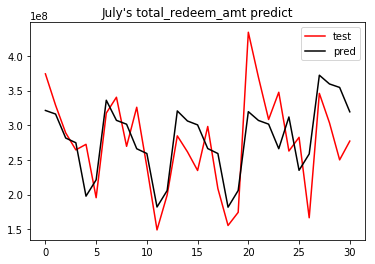

In [103]:
linreg = LinearRegression()
model = linreg.fit(X_train, Y_train)
Y_pred = linreg.predict(X_test)

f = plt.figure(facecolor='white')
plt.plot(Y_test, color='red', label='test')
plt.plot(Y_pred, color='black', label='pred')
plt.legend()
plt.title('July\'s total_redeem_amt predict')
plt.draw()

In [99]:
redeem_error = np.divide(np.abs(np.array(Y_test)
                - np.array(Y_pred).T), Y_test)
print(redeem_error)
print("MEA",redeem_error.mean(),"VAR",redeem_error.var(),"STD",redeem_error.std())

[[0.11973527 0.25889367 0.24402131 0.33818654 0.00120186 0.54449408
  0.28814226 0.12292685 0.43440783 0.06515491 0.42636843 0.76574132
  0.44582605 0.38865121 0.528603   0.7163745  0.14709445 0.63721405
  0.71669667 0.64025065 0.05191193 0.04640853 0.24971229 0.00467837
  0.39903952 0.0055361  0.86955596 0.27643204 0.36355076 0.62636943
  0.31311447]]
MEA 0.3560094946550601 VAR 0.05991061782741785 STD 0.24476645568259114


PURCHASE

[[0.15896116 0.19446607 0.10496667 0.09850852 0.21847513 0.04612771
  0.11653577 0.33753268 0.02061436 0.09713187 0.00282144 0.01576844
  0.05825733 0.09877236 0.1251056  0.28736136 0.21943498 0.00942941
  0.16367266 0.04830389 0.22423189 0.24184467 0.08022079 0.12808124
  0.04160344 0.2816492  0.03925861 0.29142751 0.20253428 0.23777199
  0.4821052 ]]
MEA 0.15074116851107713 VAR 0.012410993930746662 STD 0.11140464052608698


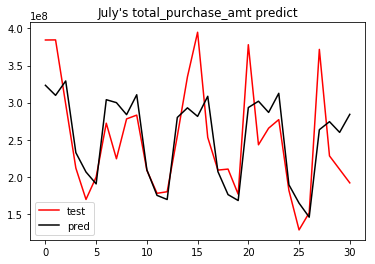

In [94]:
t1 = data_train.reset_index(drop=True)
t1 = t1[['early_mouth', 'late_mouth', 'holiday_festivel', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
          'Saturday', 'Sunday','total_redeem_amt','mfd_7daily_yield']]

X_train = pd.concat([t1], axis=1)
Y_train = data_train[['total_purchase_amt']].reset_index(drop=True)


t1 = data_test.reset_index(drop=True)
t1 = t1[['early_mouth', 'late_mouth', 'holiday_festivel', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
          'Saturday', 'Sunday','total_redeem_amt','mfd_7daily_yield']]
X_test = pd.concat([t1], axis=1)
Y_test = list(data_test['total_purchase_amt'])

linreg = LinearRegression()
model = linreg.fit(X_train, Y_train)
Y_pred = linreg.predict(X_test)

f = plt.figure(facecolor='white')
plt.plot(Y_test, color='red', label='test')
plt.plot(Y_pred, color='black', label='pred')
plt.legend()
plt.title('July\'s total_purchase_amt predict')
plt.draw()

purchase_error = np.divide(np.abs(np.array(Y_test)
                    - np.array(Y_pred).T), Y_test)
print(purchase_error)
print("MEA",purchase_error.mean(),"VAR",purchase_error.var(),"STD",purchase_error.std())

plt.show()